In [35]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv -O hw-4.csv

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from IPython.display import display

In [37]:
df = pd.read_csv('hw-4.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [39]:
cat = list(df.dtypes[df.dtypes == 'object'].index)
num = list(df.dtypes[df.dtypes != 'object'].index)

In [40]:
display(cat, num)

['card', 'owner', 'selfemp']

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [41]:
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [42]:
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [43]:
for c in cat:
    display(c, df[c].value_counts(dropna=False))

'card'

yes    1023
no      296
Name: card, dtype: int64

'owner'

no     738
yes    581
Name: owner, dtype: int64

'selfemp'

no     1228
yes      91
Name: selfemp, dtype: int64

In [44]:
yn_values = {
    'no': 0,
    'yes': 1
}

for c in cat:
    df[c] = df[c].map(yn_values)
    
for c in cat:
    display(c, df[c].value_counts(dropna=False))    


'card'

1    1023
0     296
Name: card, dtype: int64

'owner'

0    738
1    581
Name: owner, dtype: int64

'selfemp'

0    1228
1      91
Name: selfemp, dtype: int64

In [45]:
df_orig = df.copy()

In [46]:
train_ratio = 0.60
test_ratio = 0.20
#val_ratio = 0.20

val_ratio = (1/(train_ratio+test_ratio)) - 1
#print(val_ratio)

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=val_ratio, random_state=42)

In [47]:
len(df_train), len(df_train)/len(df), len(df_val), len(df_val)/len(df), len(df_test), len(df_test)/len(df)

(791, 0.599696739954511, 264, 0.2001516300227445, 264, 0.2001516300227445)

In [48]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [49]:
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

del df_train['card']
del df_val['card']
del df_test['card']

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [51]:
for c in num:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.5f' % (c, auc))

  reports, 0.72651
      age, 0.50722
   income, 0.59175
    share, 0.99209
expenditure, 0.99188
dependents, 0.55480
   months, 0.53973
majorcards, 0.54906
   active, 0.56147


In [52]:
columns = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [53]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [54]:
train_dicts = df_train[columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

In [55]:
round(roc_auc_score(y_val, y_pred),3)

0.989

In [56]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [57]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)

In [58]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,205,59,0,0
10,0.1,201,21,4,38
20,0.2,200,9,5,50
30,0.3,200,5,5,54
40,0.4,200,1,5,58
50,0.5,200,1,5,58
60,0.6,200,1,5,58
70,0.7,200,1,5,58
80,0.8,200,1,5,58
90,0.9,200,1,5,58


In [59]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

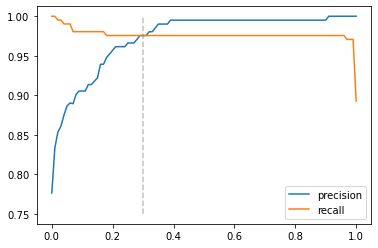

In [60]:
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.vlines(0.3, 0.75, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

In [61]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

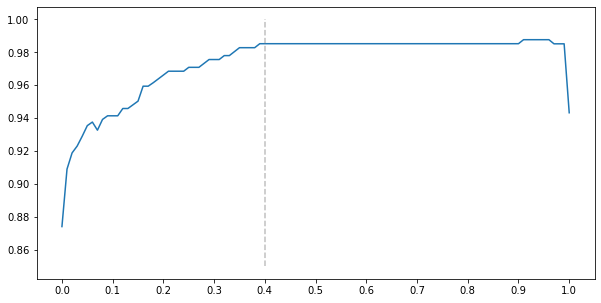

In [67]:
plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)
plt.vlines(0.4, 0.85, 1, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [63]:
from sklearn.model_selection import KFold

In [64]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    #print('C= %.2f'%C)
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [65]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)


for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values
    
    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.5f +- %.5f' % (np.mean(scores), np.std(scores)))

0.99541 +- 0.00175


In [66]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print('C=%4s, %.5f +- %.5f' % (C, np.mean(scores), np.std(scores)))
    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
 

C=0.01, 0.99157 +- 0.00431
C=0.01, 0.992 +- 0.004
C= 0.1, 0.99407 +- 0.00301
C= 0.1, 0.994 +- 0.003
C=   1, 0.99541 +- 0.00175
C=   1, 0.995 +- 0.002
C=  10, 0.99574 +- 0.00205
C=  10, 0.996 +- 0.002
